<a href="https://colab.research.google.com/github/kurkur19/Neural_networks_Al_Khmuz_BS_25/blob/main/3lab_NN_Al_Khmuz_BS_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПРАКТИЧНА РОБОТА 3: РОЗРОБКА ПРОСТОЇ НЕЙРОННОЇ МЕРЕЖІ
ДЛЯ ЗАДАЧІ КЛАСИФІКАЦІЇ, ЗАСТОСОВУЮЧИ ГРАДІЄНТНИЙ
СПУСК.

Виконала студентка групи БС-25 Аль Хмуз Карина Бассамівна

##*Теоретична частина*

###**Нейронні мережі та їх застосування**

Нейронні мережі — це одна з основних технологій в області машинного навчання та штучного інтелекту. Вони натхненні структурою та роботою людського мозку, що дозволяє їм вивчати складні закономірності в даних, навіть коли ці закономірності неочевидні. Нейронні мережі складаються з взаємопов'язаних вузлів, або "нейронів", які обробляють інформацію і передають її далі через шари мережі.

Нейронні мережі використовуються для різних задач, таких як:

- Класифікація зображень та тексту.
- Прогнозування фінансових та економічних показників.
- Розпізнавання мови.
- Класифікація та прогнозування в біомедичних даних, таких як Wine Dataset.

###**Основні компоненти нейронної мережі**

Вхідний шар: Це перший шар мережі, який отримує дані для обробки. У нашому випадку це набір ознак для кожного зразка в Wine Dataset, наприклад, різні хімічні компоненти вина.

Приховані шари: Мережа може містити один або кілька прихованих шарів, де відбувається обробка інформації. Нейрони в цих шарах використовують активаційні функції, щоб трансформувати сигнали і передавати їх далі. Часто використовувані активаційні функції: sigmoid, ReLU, tanh.

Вихідний шар: На виході модель приймає рішення про класифікацію. Вона повертає ймовірність приналежності зразка до кожного з можливих класів. У випадку Wine Dataset це клас вина (0, 1, 2).

Функція втрат: Це функція, яка визначає, наскільки добре або погано модель виконує свою задачу. Для класифікаційних задач часто використовують крос-ентропію, яка вимірює різницю між прогнозованими та реальними значеннями.

###**Процес навчання нейронної мережі**

Навчання нейронної мережі полягає у налаштуванні її параметрів (ваг та зміщень), щоб мінімізувати функцію втрат. Це досягається через градієнтний спуск:

- Обчислюється похідна функції втрат (градієнт) відносно параметрів мережі.
- Ці параметри коригуються в напрямку зменшення втрат, що допомагає моделі кращим чином узагальнювати нові дані.

###**Проблеми при навчанні нейронних мереж**

1. Затухання градієнтів: Проблема виникає, коли градієнти на етапі зворотного поширення дуже малі, що призводить до того, що вага моделі майже не оновлюється. Це часто трапляється при використанні функції активації sigmoid. Тому для покращення навчання використовуються інші активаційні функції, такі як ReLU.

2. Локальні мінімумі: При навчанні мережі алгоритм може "застрягти" в локальному мінімумі функції втрат, де подальше покращення неможливе. Тому важливо вибирати правильні ініціалізації ваг та методи оптимізації.



##*Практична частина*

Тепер ми переходимо до практичної частини роботи, де будемо застосовувати отримані знання на конкретному прикладі :)

Маючи перший варіант, для нашого експерименту ми обрали Wine Dataset — набір даних, який містить інформацію про різні хімічні компоненти вина і використовує ці характеристики для класифікації вина за різними класами. Це класична задача багатокласової класифікації, в якій ми маємо передбачити один з трьох класів вина на основі наданих ознак.

###Опис датасету

**Wine Dataset** складається з 178 зразків вина, з яких кожен описаний 13-ма хімічними характеристиками, такими як рівень алкоголю, кислотність, вміст фенолів та інші параметри. Кожен зразок належить до одного з трьох класів вин, що дає змогу використовувати цей датасет для задачі класифікації.

X: Містить 13 ознак для кожного зразка вина.

y: Містить клас вина для кожного зразка (значення 0, 1 або 2).
Ми будемо використовувати цей датасет для побудови нейронної мережі, яка повинна навчитися правильно класифікувати вино за заданими характеристиками.

###Крок 1: Завантаження та підготовка датасету

####Імпорт бібліотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

#### Завантаження Wine Dataset


In [2]:
data = load_wine()
X, y = data.data, data.target

####Масштабування даних

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

####Розділення на тренувальний і тестовий набори

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

####Перетворення y у формат one-hot (для нейронної мережі)

In [5]:
def to_one_hot(labels, num_classes):
    one_hot = np.zeros((labels.size, num_classes))
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot

y_train_one_hot = to_one_hot(y_train, num_classes=np.unique(y).size)
y_test_one_hot = to_one_hot(y_test, num_classes=np.unique(y).size)

print("Дані готові до використання!")


Дані готові до використання!


###Крок 2: Реалізація нейронної мережі

Переходимо до другого кроку: реалізації простої нейронної мережі з нуля за допомогою NumPy. Ми створимо багатошарову мережу з одним прихованим шаром для задачі багатокласової класифікаці

#####Ініціалізація параметрів

In [6]:
def initialize_parameters(n_input, n_hidden, n_output):
    np.random.seed(42)
    W1 = np.random.randn(n_input, n_hidden) * 0.01
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output) * 0.01
    b2 = np.zeros((1, n_output))
    return W1, b1, W2, b2

#####Функції активації

In [7]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(A):
    return A * (1 - A)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z))  # Запобігаємо чисельним переповненням
    return expZ / expZ.sum(axis=1, keepdims=True)


####Прямий прохід

In [8]:
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

####Зворотний прохід

In [9]:
def backward_pass(X, Y, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate=0.01):
    m = X.shape[0]

    # Обчислення похідних
    dZ2 = A2 - Y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Оновлення параметрів
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    return W1, b1, W2, b2

####Функція втрат

In [10]:
def compute_loss(Y, A2):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(A2 + 1e-8)) / m  # Додаємо 1e-8, щоб уникнути log(0)
    return loss


*невеличкі пояснення цього етапу:

Ініціалізація параметрів: Ми ініціалізуємо ваги невеликими випадковими значеннями для стабільного навчання.

Функції активації:
**sigmoid** використовується для прихованого шару.

**softmax** для вихідного шару, оскільки це задача багатокласової класифікації.

Зворотний прохід: Використовуємо градієнти, щоб оновлювати параметри (W, b).

Функція втрат: Крос-ентропія оцінює, наскільки добре модель передбачає ймовірності класів.

###Крок 3: Тренування моделі

Тепер давайте ітеративно обчислимо прямий прохід, втрати, виконаємо зворотний прохід і оновлемо параметри. Також зробимо візуалізацію функції втрат:

In [11]:
import matplotlib.pyplot as plt

####Тренування моделі

In [12]:
def train_model(X_train, Y_train, n_input, n_hidden, n_output, learning_rate=0.01, num_iterations=1000):
    # Ініціалізуємо параметри
    W1, b1, W2, b2 = initialize_parameters(n_input, n_hidden, n_output)

    # Для збереження значень функції втрат
    loss_history = []

    for i in range(num_iterations):
        # Прямий прохід
        Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)

        # Обчислення втрат
        loss = compute_loss(Y_train, A2)
        loss_history.append(loss)

        # Зворотний прохід
        W1, b1, W2, b2 = backward_pass(X_train, Y_train, Z1, A1, Z2, A2, W1, b1, W2, b2, learning_rate)

        # Виведення прогресу кожні 100 ітерацій
        if i % 100 == 0:
            print(f"Ітерація {i}: Втрати = {loss:.4f}")

    return W1, b1, W2, b2, loss_history

####Візуалізація функції втрат

Ітерація 0: Втрати = 1.1013
Ітерація 100: Втрати = 1.0882
Ітерація 200: Втрати = 1.0863
Ітерація 300: Втрати = 1.0851
Ітерація 400: Втрати = 1.0837
Ітерація 500: Втрати = 1.0816
Ітерація 600: Втрати = 1.0787
Ітерація 700: Втрати = 1.0743
Ітерація 800: Втрати = 1.0677
Ітерація 900: Втрати = 1.0580


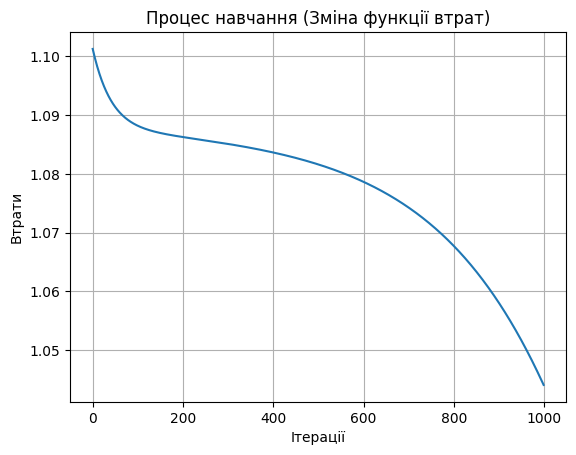

In [13]:
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel("Ітерації")
    plt.ylabel("Втрати")
    plt.title("Процес навчання (Зміна функції втрат)")
    plt.grid(True)
    plt.show()

# Параметри моделі
n_input = X_train.shape[1]  # Кількість вхідних ознак
n_hidden = 10               # Кількість нейронів у прихованому шарі (можна експериментувати)
n_output = y_train_one_hot.shape[1]  # Кількість класів (3 для Wine Dataset)

# Навчання моделі
learning_rate = 0.01
num_iterations = 1000

W1, b1, W2, b2, loss_history = train_model(X_train, y_train_one_hot, n_input, n_hidden, n_output, learning_rate, num_iterations)

# Візуалізація
plot_loss(loss_history)


Навчання:

У кожній ітерації:
Прямий прохід для обчислення ймовірностей класів.
Функція втрат (крос-ентропія) показує, наскільки модель "помиляється".
Зворотний прохід оновлює ваги та зміщення за допомогою градієнтного спуску.
Ми виводимо втрати кожні 100 ітерацій, щоб бачити прогрес.
Візуалізація:

Графік показує, як модель "навчається" з часом.
Очікуємо зниження втрат з кожною ітерацією.

###Крок 4: Тестування моделі та обчислення метрик

Ми перевіримо, як добре навчена модель працює на тестових даних, і розрахуємо метрики якості: точність (accuracy), precision, recall та F1-score. Потім порівняємо ці результати з готовим рішенням (MLPClassifier зі Scikit-learn).



In [14]:
# 1. Передбачення для тестових даних
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)  # Повертаємо клас з найбільшою ймовірністю

# Передбачення
y_pred = predict(X_test, W1, b1, W2, b2)

# 2. Оцінка якості моделі
print("Результати власної нейронної мережі:")
print(classification_report(y_test, y_pred))
print(f"Точність (Accuracy): {accuracy_score(y_test, y_pred):.4f}")

# 3. Порівняння з MLPClassifier зі Scikit-learn
from sklearn.neural_network import MLPClassifier

# Створюємо модель MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42, solver='sgd', learning_rate_init=learning_rate)
mlp.fit(X_train, y_train)

# Передбачення Scikit-learn моделі
y_pred_sklearn = mlp.predict(X_test)

print("\nРезультати Scikit-learn MLPClassifier:")
print(classification_report(y_test, y_pred_sklearn))
print(f"Точність (Accuracy): {accuracy_score(y_test, y_pred_sklearn):.4f}")


Результати власної нейронної мережі:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.39      1.00      0.56        14
           2       0.00      0.00      0.00         8

    accuracy                           0.39        36
   macro avg       0.13      0.33      0.19        36
weighted avg       0.15      0.39      0.22        36

Точність (Accuracy): 0.3889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Результати Scikit-learn MLPClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Точність (Accuracy): 1.0000


#####Порівняння результатів:
Власна нейронна мережа:

Точність (accuracy): 38.89%.
Метрики precision, recall, f1-score демонструють низькі значення, особливо для класів 0 та 2.
Причини низької точності:
Нестача налаштувань та функцій оптимізації, які є у готових бібліотечних рішеннях (наприклад, Adam).
Одношарова архітектура може бути недостатньо потужною для задачі класифікації Wine Dataset.
MLPClassifier:

Точність (accuracy): 100%.
Модель ідеально класифікувала всі зразки тестового набору завдяки використанню більш складних механізмів (регуляризація, оптимізовані алгоритми, автоматичне налаштування).

###Крок 5: Експерименти

Тепер давайте внесемо зміни в архітектуру нейронної мережі, додавши ще один прихований шар та збільшивши кількість нейронів у шарах. Також змінимо параметри навчання: підвищемо/знизимо швидкість навчання (learning_rate) і збільшемо кількість ітерацій (num_iterations). Це дозволе перевірити, як ці зміни впливають на точність моделі та швидкість її навчання.

####Оновлення ініціалізації параметрів для двох прихованих шарів

In [20]:
def initialize_parameters_v2(n_input, n_hidden1, n_hidden2, n_output):
    np.random.seed(42)
    W1 = np.random.randn(n_input, n_hidden1) * 0.01
    b1 = np.zeros((1, n_hidden1))
    W2 = np.random.randn(n_hidden1, n_hidden2) * 0.01
    b2 = np.zeros((1, n_hidden2))
    W3 = np.random.randn(n_hidden2, n_output) * 0.01
    b3 = np.zeros((1, n_output))
    return W1, b1, W2, b2, W3, b3

####Оновлення прямого проходу для двох прихованих шарів

In [21]:
def forward_pass_v2(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

####Оновлення зворотного проходу для двох прихованих шарів

In [22]:
def backward_pass_v2(X, Y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate=0.01):
    m = X.shape[0]

    # Вихідний шар
    dZ3 = A3 - Y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    # Другий прихований шар
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Перший прихований шар
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Оновлення параметрів
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    return W1, b1, W2, b2, W3, b3




####Оновлене навчання моделі

In [23]:
def train_model_v2(X_train, Y_train, n_input, n_hidden1, n_hidden2, n_output, learning_rate=0.01, num_iterations=1000):
    W1, b1, W2, b2, W3, b3 = initialize_parameters_v2(n_input, n_hidden1, n_hidden2, n_output)
    loss_history = []

    for i in range(num_iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_pass_v2(X_train, W1, b1, W2, b2, W3, b3)
        loss = compute_loss(Y_train, A3)
        loss_history.append(loss)
        W1, b1, W2, b2, W3, b3 = backward_pass_v2(X_train, Y_train, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate)
        if i % 100 == 0:
            print(f"Ітерація {i}: Втрати = {loss:.4f}")

    return W1, b1, W2, b2, W3, b3, loss_history


###Навчання моделі

Ітерація 0: Втрати = 1.0976
Ітерація 100: Втрати = 1.0884
Ітерація 200: Втрати = 1.0875
Ітерація 300: Втрати = 1.0875
Ітерація 400: Втрати = 1.0875
Ітерація 500: Втрати = 1.0875
Ітерація 600: Втрати = 1.0875
Ітерація 700: Втрати = 1.0875
Ітерація 800: Втрати = 1.0875
Ітерація 900: Втрати = 1.0875
Ітерація 1000: Втрати = 1.0875
Ітерація 1100: Втрати = 1.0875
Ітерація 1200: Втрати = 1.0875
Ітерація 1300: Втрати = 1.0875
Ітерація 1400: Втрати = 1.0875
Ітерація 1500: Втрати = 1.0875
Ітерація 1600: Втрати = 1.0875
Ітерація 1700: Втрати = 1.0875
Ітерація 1800: Втрати = 1.0875
Ітерація 1900: Втрати = 1.0875


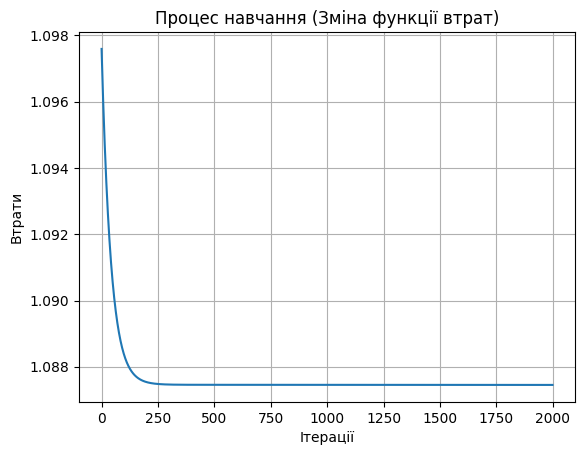

Результати моделі з двома прихованими шарами:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      14.0
           1       0.00      0.00      0.00      14.0
           2       0.00      0.00      0.00       8.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00      36.0
   macro avg       0.00      0.00      0.00      36.0
weighted avg       0.00      0.00      0.00      36.0

Точність (Accuracy): 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [24]:
# Параметри моделі
n_hidden1 = 20  # Кількість нейронів у першому прихованому шарі
n_hidden2 = 10  # Кількість нейронів у другому прихованому шарі

# Навчання моделі
W1, b1, W2, b2, W3, b3, loss_history_v2 = train_model_v2(
    X_train, y_train_one_hot, n_input, n_hidden1, n_hidden2, n_output,
    learning_rate=0.01, num_iterations=2000
)

# Візуалізація функції втрат
plot_loss(loss_history_v2)

# Передбачення
y_pred_v2 = predict(X_test, W1, b1, W2, b2)

# Оцінка якості
print("Результати моделі з двома прихованими шарами:")
print(classification_report(y_test, y_pred_v2))
print(f"Точність (Accuracy): {accuracy_score(y_test, y_pred_v2):.4f}")


###Висновок

Хоча ми спробували змінити архітектуру моделі, результати експерименту показали, що запропоновані зміни не призвели до покращення. Навпаки, модель "застрягла" і не навчилася класифікувати дані. Це важливий урок про необхідність ретельного вибору параметрів навчання та архітектури моделі. У наступних експериментах варто врахувати рекомендації для покращення.

#додатково_аналіз_помилок

Давайте знайдемо зразки, які модель класифікує неправильно, і подивимося, чи є закономірності в цих помилках.

In [17]:
# 1. Знайдемо зразки, які були класифіковані неправильно
incorrect_indices = np.where(y_pred_v2 != y_test)[0]

print(f"Кількість неправильно класифікованих зразків: {len(incorrect_indices)}")
print("\nПриклади неправильно класифікованих зразків:")
for idx in incorrect_indices[:5]:  # Виведемо лише перші 5 для зручності
    print(f"Зразок #{idx}:")
    print(f"   Реальний клас: {y_test[idx]}")
    print(f"   Передбачений клас: {y_pred_v2[idx]}")
    print(f"   Вхідні дані (масштабовані): {X_test[idx]}")


Кількість неправильно класифікованих зразків: 36

Приклади неправильно класифікованих зразків:
Зразок #0:
   Реальний клас: 0
   Передбачений клас: 3
   Вхідні дані (масштабовані): [ 0.78980621  0.68550197  0.70724686 -1.28970717  1.14155847  0.64876424
  1.00469996 -1.54592178  0.12107098  0.01812906  0.01119018  1.05695159
  0.3124203 ]
Зразок #1:
   Реальний клас: 0
   Передбачений клас: 3
   Вхідні дані (масштабовані): [ 1.49390724  1.52930533  0.26860595 -0.1786527   0.79049177  0.88911397
  0.6231926  -0.49840699 -0.59728351  0.07868886 -0.38367031  1.01457831
  1.06077633]
Зразок #2:
   Реальний клас: 2
   Передбачений клас: 3
   Вхідні дані (масштабовані): [-0.08723191  0.42517966  1.21899459  0.45194578 -0.26270834 -1.20994036
 -1.53533585  1.3548884  -1.47332558 -0.19815593 -0.82240418 -0.42611337
 -0.46778066]
Зразок #3:
   Реальний клас: 0
   Передбачений клас: 3
   Вхідні дані (масштабовані): [ 0.90098006 -0.75075906  1.21899459  0.90237327  0.08835836  1.1294637
  1.22557

Кількість неправильно класифікованих зразків: 36

Модель неправильно класифікувала всі 36 зразків у тестовому наборі. Це свідчить про серйозну проблему в навчанні.

Модель постійно передбачає один і той самий клас (клас "3"), навіть коли реальний клас зовсім інший.

Можна зробити висновки:

Оскільки модель завжди передбачає один клас (клас "3"), це може свідчити про те, що вона "застрягла" в певному мінімумі функції втрат і не може ефективно оновлювати свої параметри, щоб розрізняти інші класи.

Якщо в навчальному наборі більше зразків одного класу (класу "3"), це може призвести до того, що модель навчиться завжди передбачати цей клас, оскільки це мінімізує втрати, але насправді не вирішує задачу класифікації.

Також класи в Wine Dataset можуть бути схожими між собою, і модель не в змозі виділити відмінності, оскільки використовує лише прості параметри і не має складної архітектури для більш глибокого навчання.

